# Ensemble Classification

In [1]:
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import Markdown
import matplotlib.pyplot as plt

import numpy as np
import random as rnd
import seaborn as sns

In [2]:
# from matplotlib import colormaps
# list(colormaps)

In [3]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4

np.random.seed(N_SEED)
rnd.seed(N_SEED)
COLOR_MAP = "Spectral"

In [4]:
def plot_features(x, target):
    _, col = x.shape
    font = {
        "color": "darkblue",
        "size": 11
    }
    for i in range(col):
        plt.scatter(x[:, i], target, color="red", s=4,)
        plt.xlabel("X: {i}".format(i=i), fontdict=font)
        plt.ylabel("Target", fontdict=font)
        ax = plt.gca()
        ax.spines["bottom"].set_color("brown")
        ax.spines["top"].set_color("white")
        ax.spines["left"].set_color("brown")
        ax.spines["right"].set_color("white")
        ax.tick_params(axis="x", colors="brown")
        ax.tick_params(axis="y", colors="brown")
        plt.show();

        plt.hist(x[:, i], color="green", linewidth=0.5, edgecolor="red")
        plt.xlabel("X: {i}".format(i=i), fontdict=font)
        plt.ylabel("Population", fontdict=font)
        ax = plt.gca()
        ax.spines["bottom"].set_color("brown")
        ax.spines["top"].set_color("white")
        ax.spines["left"].set_color("brown")
        ax.spines["right"].set_color("white")
        ax.tick_params(axis="x", colors="brown")
        ax.tick_params(axis="y", colors="brown")
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    font = {
        "color": "darkblue",
        "size": 11
    }

    plt.barh(unique, counts, color="darkblue", linewidth=0.5, edgecolor="red")
    plt.xlabel("Class", fontdict=font)
    plt.ylabel("Size", fontdict=font)
    ax = plt.gca()
    ax.spines["bottom"].set_color("brown")
    ax.spines["top"].set_color("white")
    ax.spines["left"].set_color("brown")
    ax.spines["right"].set_color("white")
    ax.tick_params(axis="x", colors="brown")
    ax.tick_params(axis="y", colors="brown")
    plt.show();

## Self-created dataset

In [5]:
X = np.array([[1.0], [2.0], [3.0], [4.0], [4.5], [5.5]])
y = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])

X_test = np.array([[3], [5.1]])
y_test = np.array([[0.0], [1.0]])

### Create a model and fit data into the model

In [6]:
rfc_model = RandomForestClassifier(
    random_state=N_SEED,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
).fit(X, y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [7]:
gbc_model = GradientBoostingClassifier(
    random_state=N_SEED,
    verbose=VERBOSE,
).fit(X, y)

      Iter       Train Loss   Remaining Time 
         1           1.1963            0.13s
         2           1.0407            0.08s
         3           0.9109            0.06s
         4           0.8012            0.05s
         5           0.7075            0.04s
         6           0.6268            0.04s
         7           0.5568            0.03s
         8           0.4957            0.03s
         9           0.4422            0.03s
        10           0.3951            0.03s
        20           0.1355            0.02s
        30           0.0487            0.02s
        40           0.0178            0.01s
        50           0.0065            0.01s
        60           0.0024            0.01s
        70           0.0009            0.01s
        80           0.0003            0.00s
        90           0.0001            0.00s
       100           0.0000            0.00s


In [8]:
rfc_model.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


1.0

In [9]:
gbc_model.score(X_test, y_test)

1.0

### Predict

In [10]:
y_rfc_pred = rfc_model.predict(X_test)
y_rfc_pred

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0., 1.])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


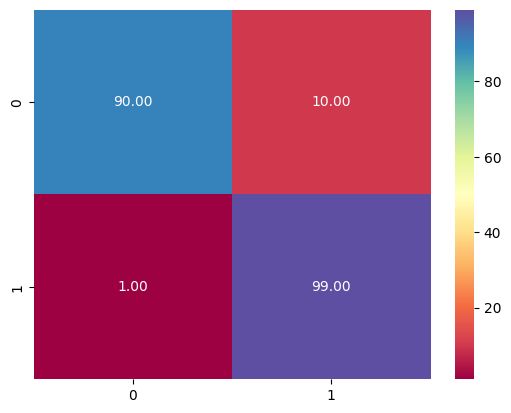

In [11]:
y_rfc_p = rfc_model.predict_proba(X_test) * 100
sns.heatmap(y_rfc_p, annot=True, cmap=COLOR_MAP, fmt=".2f");

In [12]:
y_gbc_pred = gbc_model.predict(X_test)
y_gbc_pred

array([0., 1.])

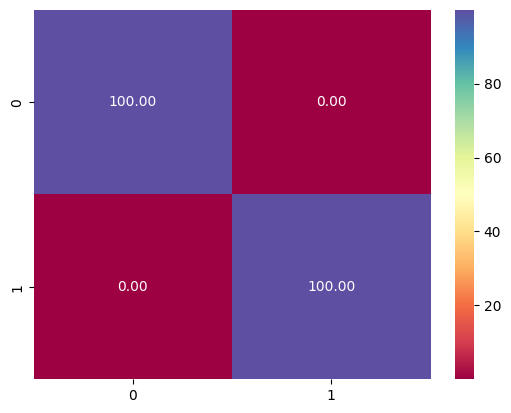

In [13]:
y_gbc_p = gbc_model.predict_proba(X_test) * 100
sns.heatmap(y_gbc_p, annot=True, cmap=COLOR_MAP, fmt=".2f");

## Iris dataset (classification problem)

In [14]:
X1, y1 = load_iris(return_X_y=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=N_SEED)

### EDA

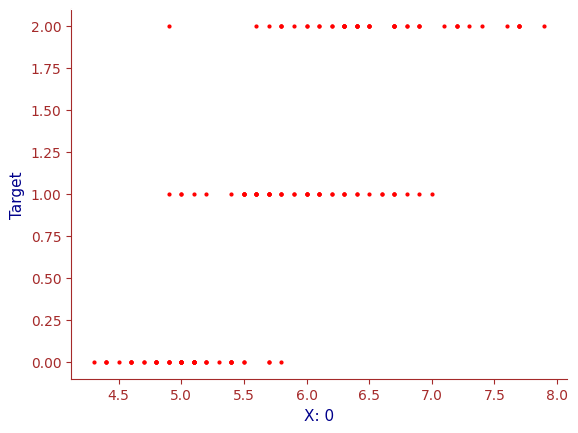

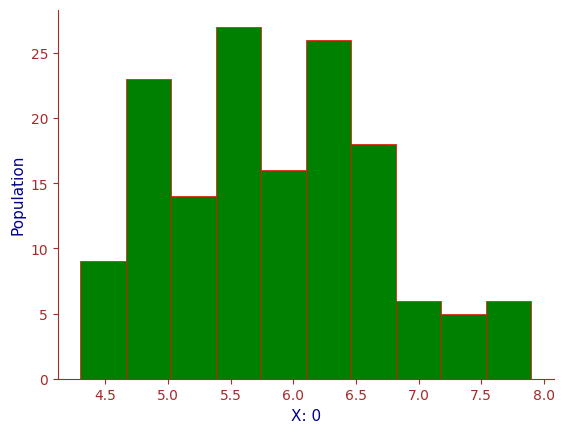

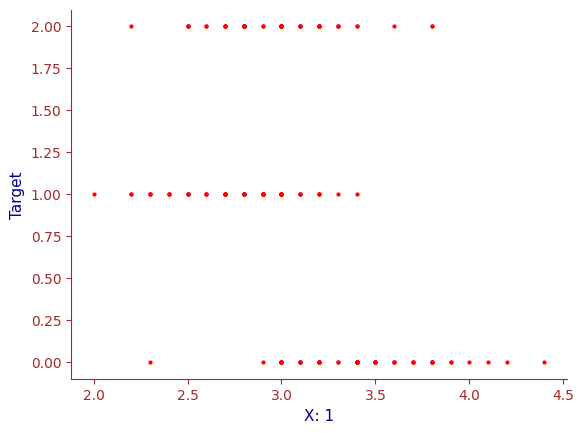

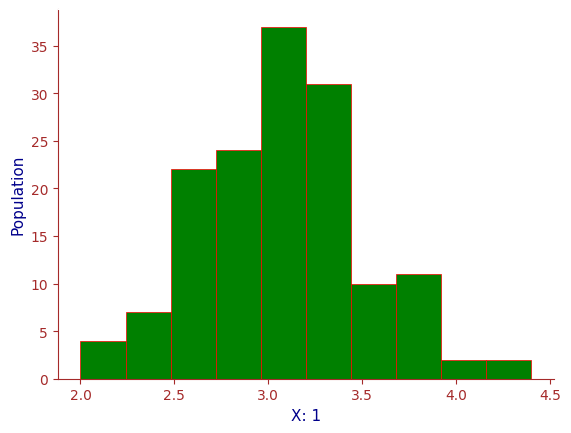

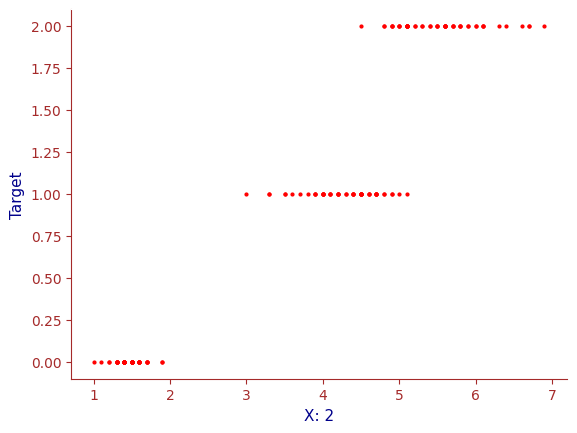

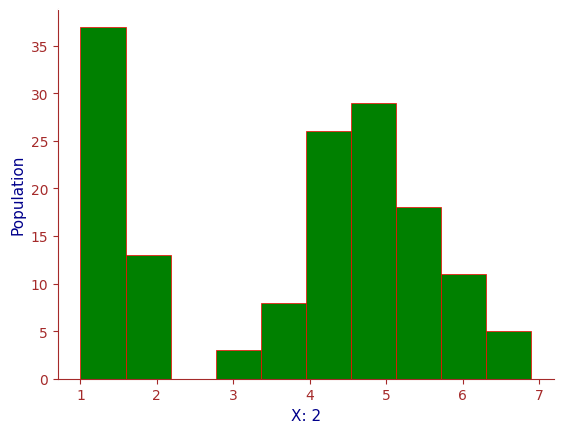

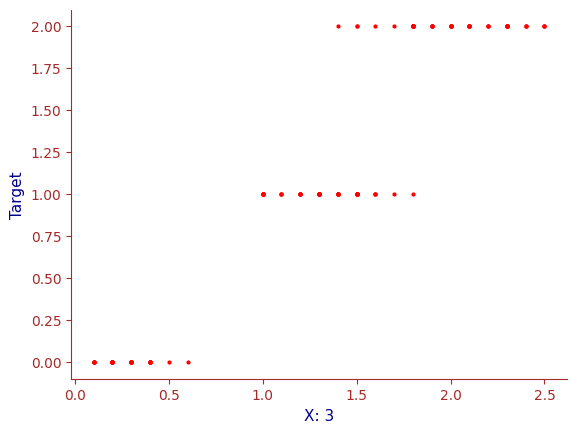

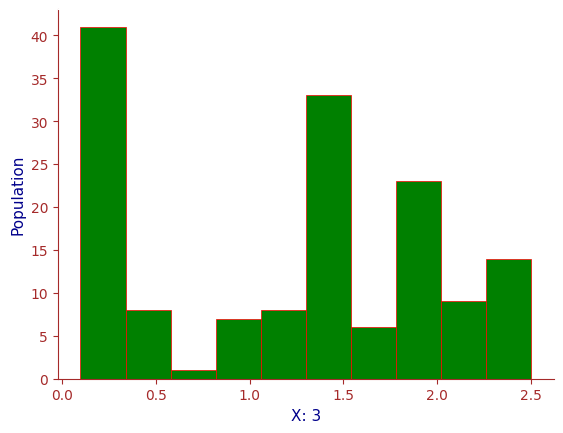

In [15]:
plot_features(X1, y1)

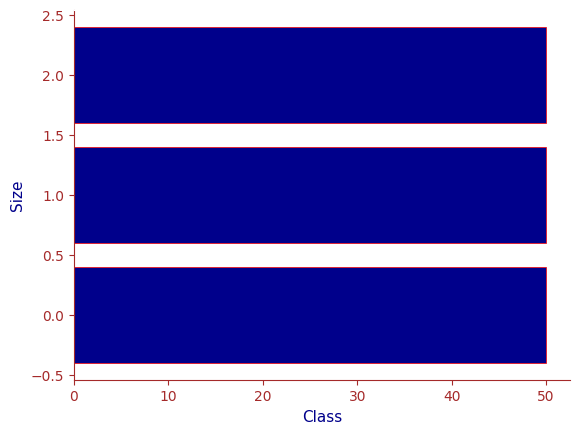

In [16]:
plot_class_dist(y1)

### Create a model and fit data into the model

In [17]:
rfc_model1 = RandomForestClassifier(
    random_state=N_SEED,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
).fit(X1_train, y1_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [18]:
gbc_model1 = GradientBoostingClassifier(
    random_state=N_SEED,
    verbose=VERBOSE,
).fit(X1_train, y1_train)

      Iter       Train Loss   Remaining Time 
         1           0.9164            0.14s
         2           0.7751            0.12s
         3           0.6616            0.11s
         4           0.5687            0.10s
         5           0.4917            0.10s
         6           0.4267            0.10s
         7           0.3718            0.09s
         8           0.3255            0.09s
         9           0.2854            0.09s
        10           0.2511            0.08s
        20           0.0779            0.07s
        30           0.0292            0.06s
        40           0.0128            0.05s
        50           0.0060            0.04s
        60           0.0031            0.03s
        70           0.0017            0.02s
        80           0.0008            0.02s
        90           0.0004            0.01s
       100           0.0002            0.00s


### Predict

In [19]:
y1_rfc_pred = rfc_model1.predict(X1_test)
y1_rfc_pred[:TOP_K]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 2, 1, 1, 0])

In [20]:
y1_gbc_pred = gbc_model1.predict(X1_test)
y1_gbc_pred[:TOP_K]

array([0, 2, 1, 1, 0])

In [21]:
y1_test[:TOP_K]

array([0, 2, 1, 1, 0])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


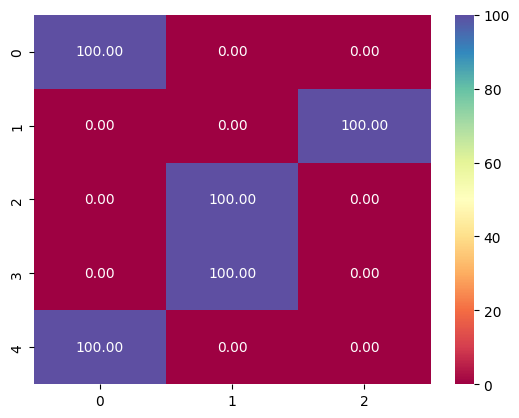

In [22]:
y1_rfc_p = rfc_model1.predict_proba(X1_test) * 100
sns.heatmap(y1_rfc_p[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f");

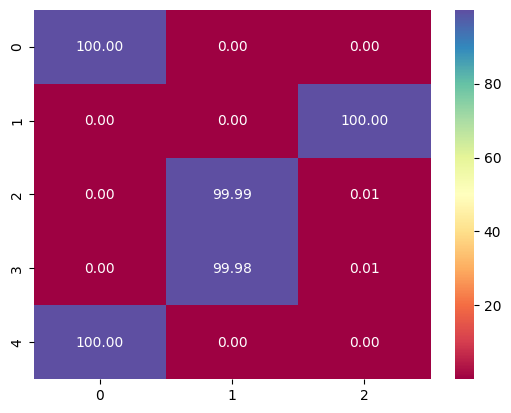

In [23]:
y1_gbc_p = gbc_model1.predict_proba(X1_test) * 100
sns.heatmap(y1_gbc_p[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f");

### Confusion Matrix

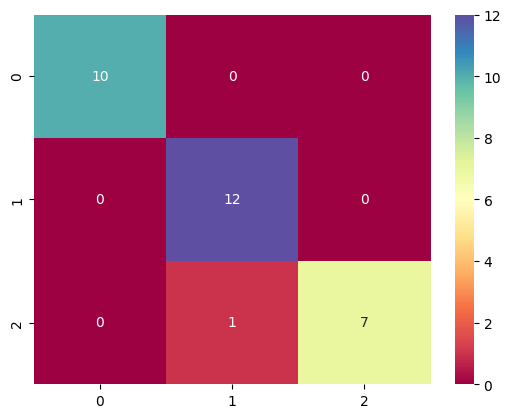

In [24]:
cm1_rfc = confusion_matrix(y_true=y1_test, y_pred=y1_rfc_pred)
sns.heatmap(cm1_rfc, annot=True, cmap=COLOR_MAP, fmt=".0f");

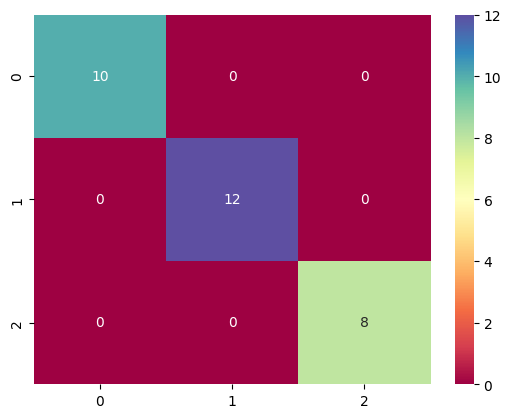

In [25]:
cm1_gbc = confusion_matrix(y_true=y1_test, y_pred=y1_gbc_pred)
sns.heatmap(cm1_gbc, annot=True, cmap=COLOR_MAP, fmt=".0f");

### Classification Report

In [26]:
Markdown(classification_report(y_true=y1_test, y_pred=y1_rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


In [27]:
Markdown(classification_report(y_true=y1_test, y_pred=y1_gbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


# Ensemble Regression

In [28]:
X2, y2 = load_diabetes(return_X_y=True)

In [29]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=N_SEED)

### EDA

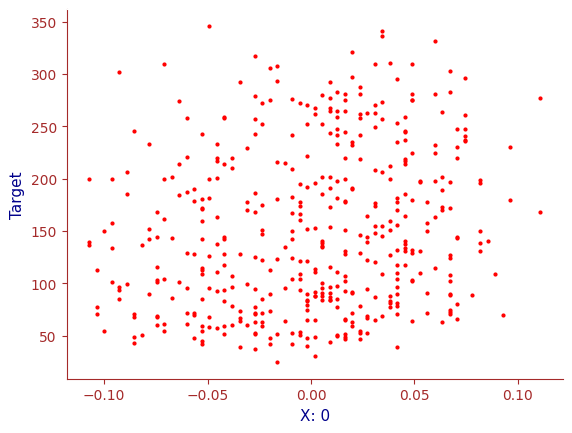

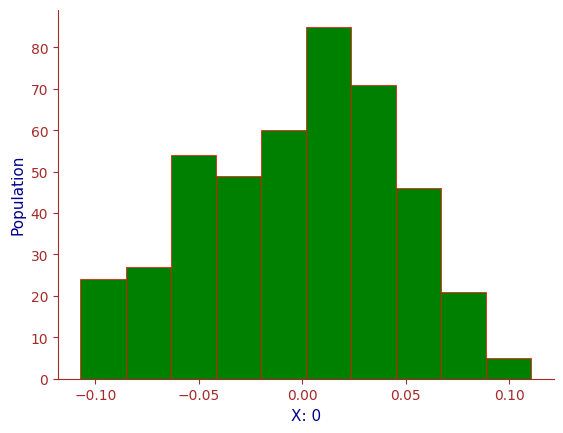

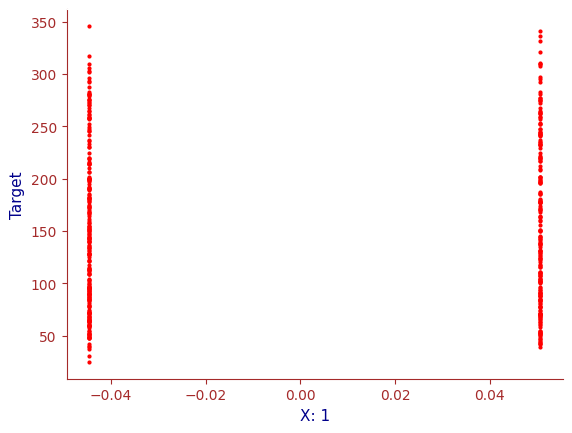

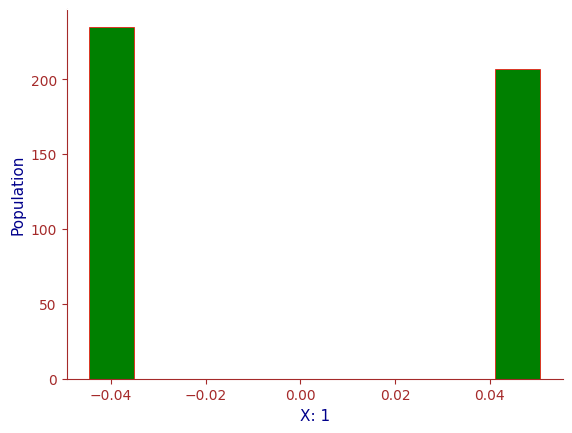

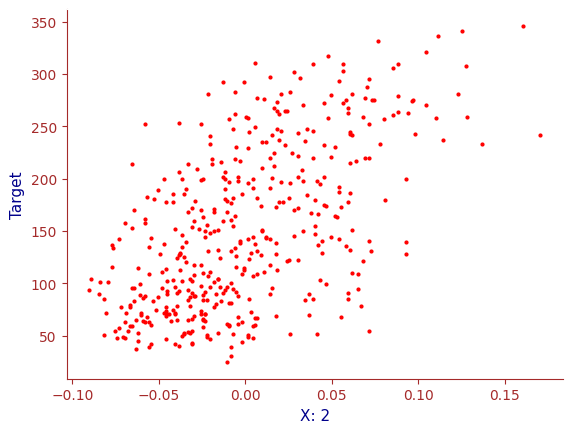

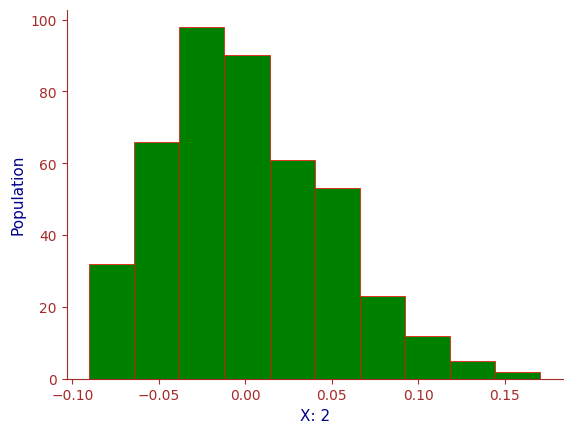

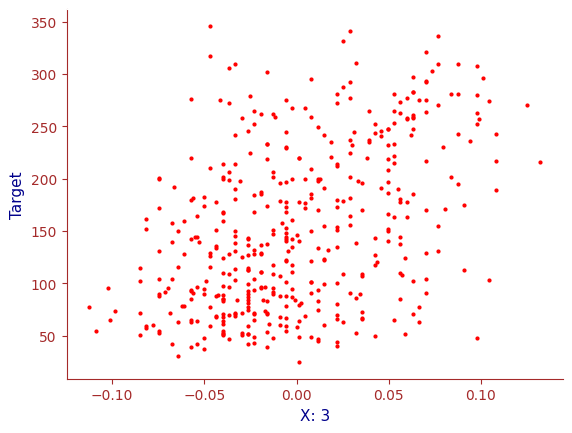

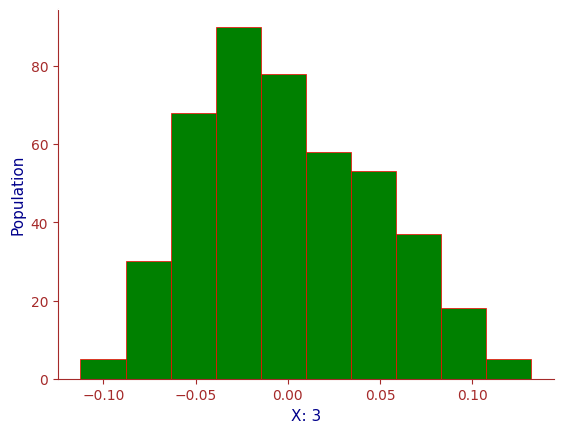

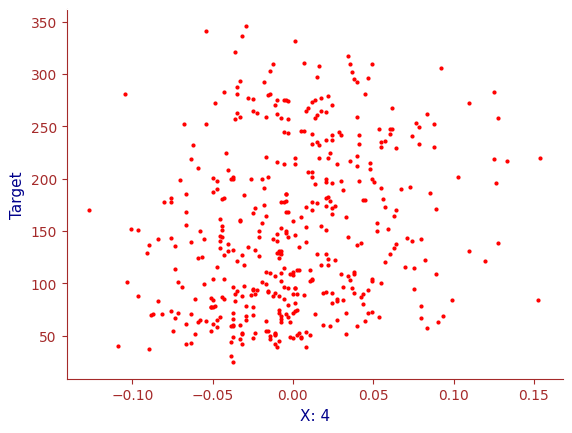

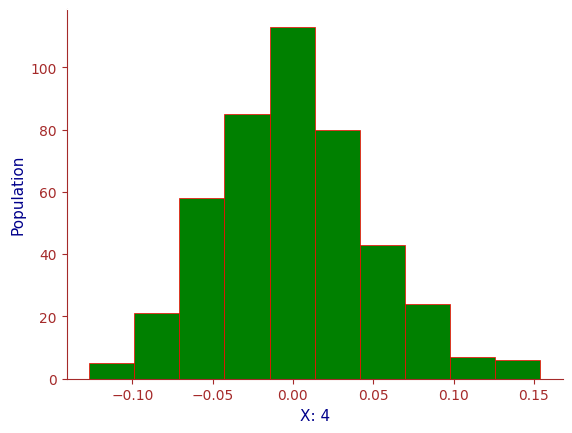

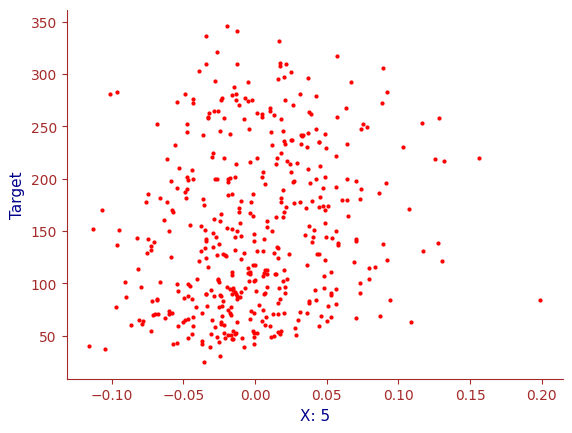

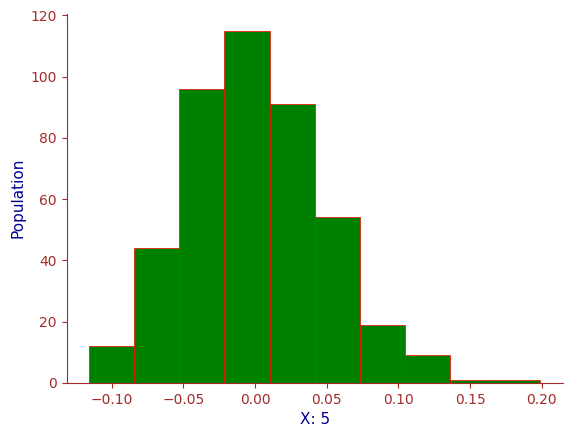

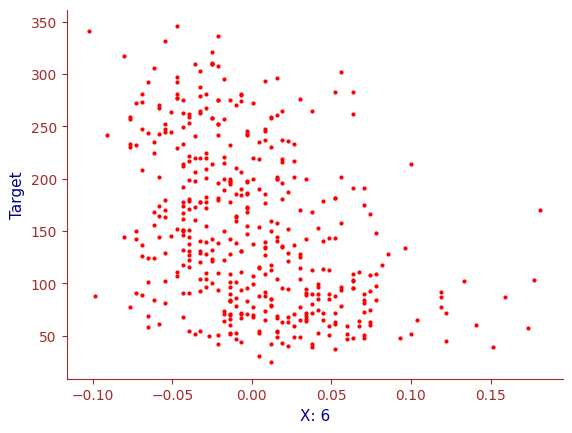

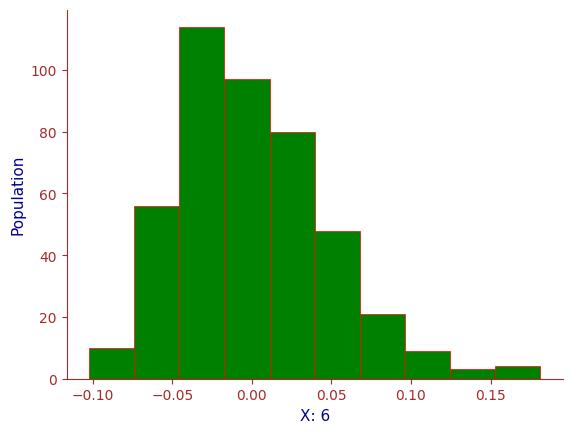

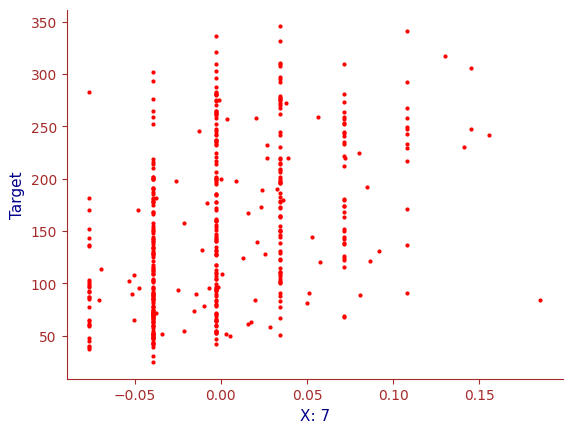

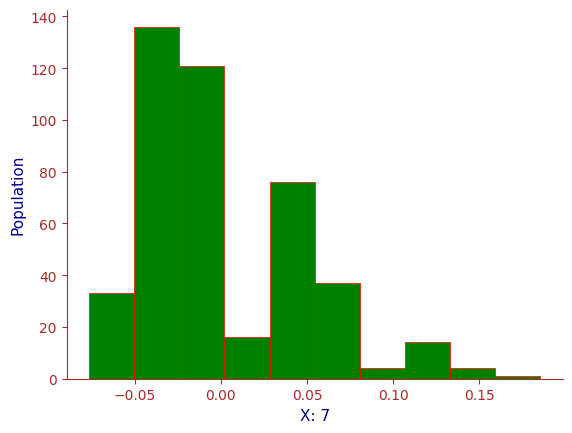

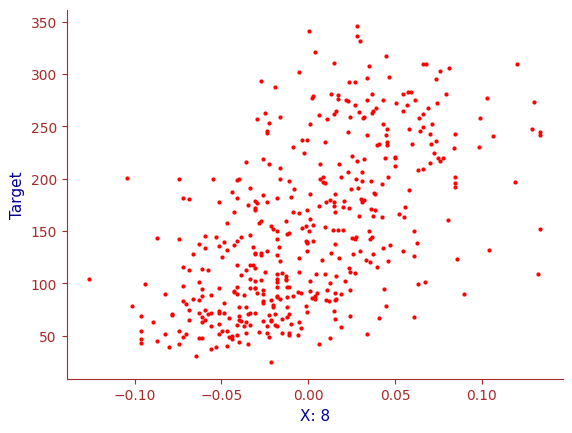

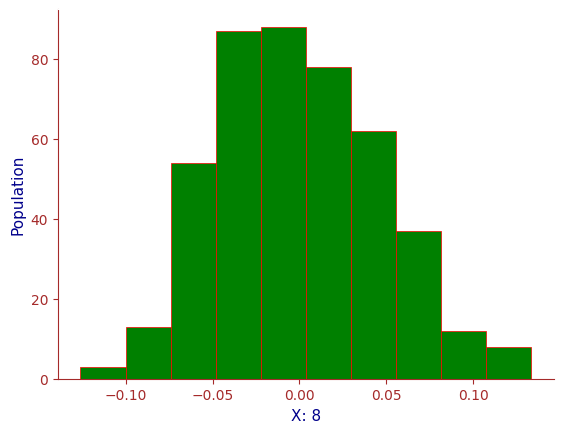

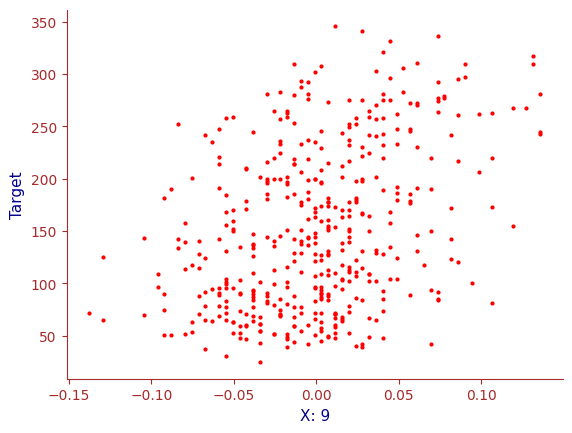

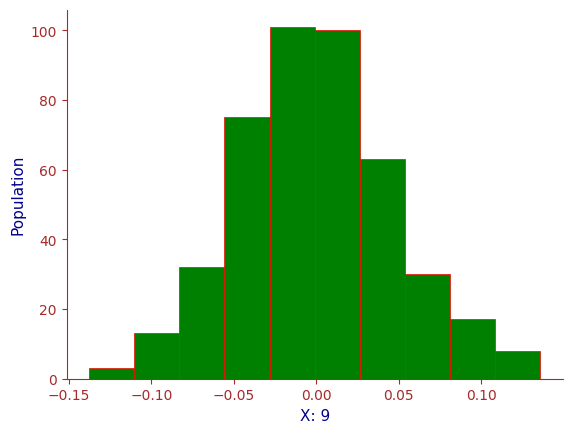

In [30]:
plot_features(X2, y2)

In [31]:
rfr_model = RandomForestRegressor(
    max_features=0.1,
    random_state=N_SEED,
    n_jobs=N_JOBS,
    verbose=VERBOSE,
).fit(X2_train, y2_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [32]:
rfr_model.score(X2_train, y2_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9233716271154132

In [33]:
y2_rfr_pred = rfr_model.predict(X2_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [34]:
y2_rfr_pred[:TOP_K]

array([212.69, 224.49, 218.24, 156.5 , 142.11])

In [35]:
y2_test[:TOP_K]

array([268., 303., 186., 170., 109.])

In [36]:
mean_squared_error(y2_test, y2_rfr_pred)

np.float64(3811.319906741573)

In [37]:
mean_absolute_error(y2_test, y2_rfr_pred)

np.float64(50.811797752808985)